In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/tkseneee/dataset/master/k_circle_sales.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7774 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         6473 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Profit                       8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [ ]:
# Outlet sales we have a deviation in outlayers check mean and median (50% data)

In [4]:
df.shape

(8523, 13)

In [ ]:
#count, Median ,Unique are the catogarical mesurements

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [10]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

In [11]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace({'nan':np.nan,'  --':np.nan,'na':np.nan,'  -':np.nan,'?':np.nan,'NAN':np.nan})

In [12]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [14]:
df['Outlet_Location_Type'].isnull().sum()

2410

In [16]:
df['Outlet_Location_Type'].mode(0)

0    Tier 2
dtype: object

In [22]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace({np.nan:'Tier 2'})

In [23]:
df['Outlet_Location_Type'].value_counts()

Tier 2    5203
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [24]:
df['Outlet_Size'].isnull().sum()

2410

In [25]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [31]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

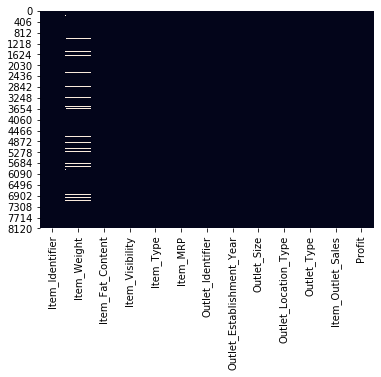

In [34]:
sns.heatmap(df.isnull(),cbar=False)

In [35]:
df['Item_Weight'].isnull().sum()

749

In [36]:
df['Item_Weight']=df['Item_Weight'].replace({0:np.nan})

In [41]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [42]:
df['Item_Weight'].isnull().sum()

0

In [43]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,4.226124,0.051598,62.258099,8.371760,1706.499616,1.701840
min,4.555000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,9.310000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,12.857645,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.000000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [44]:
df.shape

(8523, 13)

In [46]:
pd.get_dummies(df['Item_Fat_Content'],drop_first = True)

,Low Fat,Regular,low fat,reg
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
8518,1,0,0,0
8519,0,1,0,0
8520,1,0,0,0
8521,0,1,0,0


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#label Encoding
encode=LabelEncoder()
df['Label_encoded_Location_Type']=encode.fit_transform(df['Outlet_Location_Type'])

In [49]:
df['Label_encoded_Location_Type']

0       0
1       0
2       0
3       0
4       1
       ..
8518    1
8519    0
8520    2
8521    0
8522    2
Name: Label_encoded_Location_Type, Length: 8523, dtype: int32

In [60]:
#ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
orderencoding = OrdinalEncoder(categories=[["Small","Medium","High"]])


In [63]:
df['Order_Outlet_Size']=orderencoding.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [67]:
df['Order_Outlet_Size'].head(25)

0     1.0
1     1.0
2     1.0
3     1.0
4     2.0
5     1.0
6     2.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    0.0
14    2.0
15    0.0
16    1.0
17    1.0
18    1.0
19    0.0
20    2.0
21    1.0
22    0.0
23    0.0
24    0.0
Name: Order_Outlet_Size, dtype: float64

In [68]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_encoded_Location_Type,order_Outlet_Size,Order_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0,1.0,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0,1.0,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0,1.0,1.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6,0,1.0,1.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,1,2.0,2.0


In [ ]:
#frequency Encoder

 

In [ ]:
#scaling is nothing but reducing the range
